In [25]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [26]:
input_dir = './Output_FE_Assignment_1__Flike/'
output_dir = './Output_FE_Assignment_1__2nd/'
arg_skip_row_ind_GEV = {'c1':[100,99,99], 'c2':[98,98,98], 'c3':[99,98,98], 'full':[128]}
arg_skip_row_ind_LP3 = {'c1':[100,100,100], 'c2':[98,98,98], 'c3':[99,98,99], 'full':[137]}

print(
    input_dir,
    output_dir,
    arg_skip_row_ind_GEV,
    arg_skip_row_ind_LP3,
    sep='\n'
    )

./Output_FE_Assignment_1__Flike/
./Output_FE_Assignment_1__2nd/
{'c1': [100, 99, 99], 'c2': [98, 98, 98], 'c3': [99, 98, 98], 'full': [128]}
{'c1': [100, 100, 100], 'c2': [98, 98, 98], 'c3': [99, 98, 99], 'full': [137]}


In [27]:
def create_output_dir(arg_output_dir):
    """create output directory if it does not exist

    arguments:
        [string] --> arg_output_dir = path of the output directory name
    """
    if not os.path.exists(arg_output_dir):
        os.makedirs(arg_output_dir)

In [28]:
create_output_dir(output_dir)
output_dir

'./Output_FE_Assignment_1__2nd/'

In [29]:
def list_files(arg_directory_path, arg_regex, arg_column_name='file_path'):
    """return list of files in a directory

    arguments:
        [string] --> arg_directory_path = directory path of the polygons
        [string] --> arg_regex = regex entry
        [string] --> arg_column_name = column's name
    """
    list_files = glob.glob(pathname=arg_directory_path + arg_regex)
    list_files = pd.DataFrame(list_files, columns=[arg_column_name])
    list_files.sort_values(by=[arg_column_name], inplace=True)
    list_files.reset_index(drop=True, inplace=True)

    return list_files

In [30]:
arg_skip_row_ind_GEV = list(ind2 for ind1 in arg_skip_row_ind_GEV.values() for ind2 in ind1)
arg_skip_row_ind_LP3 = list(ind2 for ind1 in arg_skip_row_ind_LP3.values() for ind2 in ind1)

print(arg_skip_row_ind_LP3, arg_skip_row_ind_GEV)

[100, 100, 100, 98, 98, 98, 99, 98, 99, 137] [100, 99, 99, 98, 98, 98, 99, 98, 98, 128]


In [31]:
results = list_files(input_dir, '*.txt', 'file_name')
results.file_name = results.file_name.str.split(pat='/').str[-1]
results['data_case'] = results.file_name.str.split(pat='__').str[1]
results['prob_fit'] = results.file_name.str.split(pat='__').str[-1].str.split(pat='.').str[0]
results.sort_values(by=['prob_fit', 'data_case'], inplace=True)
results.reset_index(drop=True, inplace=True)
results = pd.concat(objs=[results, pd.Series(data=arg_skip_row_ind_GEV + arg_skip_row_ind_LP3, name='skip_row_ind')], axis=1)
results

,file_name,data_case,prob_fit,skip_row_ind
0,results__data_case_1_0_1960_1970__Bayes__NoInf...,data_case_1_0_1960_1970,GEV,100
1,results__data_case_1_1_1970_1980__Bayes__NoInf...,data_case_1_1_1970_1980,GEV,99
2,results__data_case_1_2_1980_1990__Bayes__NoInf...,data_case_1_2_1980_1990,GEV,99
3,results__data_case_2_0_1960_1969__Bayes__NoInf...,data_case_2_0_1960_1969,GEV,98
4,results__data_case_2_1_1970_1979__Bayes__NoInf...,data_case_2_1_1970_1979,GEV,98
5,results__data_case_2_2_1980_1989__Bayes__NoInf...,data_case_2_2_1980_1989,GEV,98
6,results__data_case_3_0_1961_1970__Bayes__NoInf...,data_case_3_0_1961_1970,GEV,99
7,results__data_case_3_1_1971_1980__Bayes__NoInf...,data_case_3_1_1971_1980,GEV,98
8,results__data_case_3_2_1981_1990__Bayes__NoInf...,data_case_3_2_1981_1990,GEV,98
9,results__full_data__Bayes__NoInf__GEV.txt,full_data,GEV,128


In [32]:
def func_read_table(arg_input_dir, arg_output_dir, arg_file_name, arg_data_case, arg_prob_fit, arg_skip_row_ind):
    df = pd.read_table(
        filepath_or_buffer='{}{}'.format(arg_input_dir, arg_file_name), 
        sep='\s+', header=None, names=['ARI', 'flow_rate', 'lower_5', 'upper_95'], 
        skiprows=arg_skip_row_ind, nrows=12
        )
    df.to_csv(path_or_buf='{}{}_{}.csv'.format(arg_output_dir, arg_prob_fit, arg_data_case), index=False)

    return df

In [33]:
results['df'] = results.apply(func=lambda arg: func_read_table(input_dir, output_dir, arg.file_name, arg.data_case, arg.prob_fit, arg.skip_row_ind), axis=1)
results

,file_name,data_case,prob_fit,skip_row_ind,df
0,results__data_case_1_0_1960_1970__Bayes__NoInf...,data_case_1_0_1960_1970,GEV,100,ARI flow_rate lower_5 upper_95 0 ...
1,results__data_case_1_1_1970_1980__Bayes__NoInf...,data_case_1_1_1970_1980,GEV,99,ARI flow_rate lower_5 upper_95 0 ...
2,results__data_case_1_2_1980_1990__Bayes__NoInf...,data_case_1_2_1980_1990,GEV,99,ARI flow_rate lower_5 upper_95 0 ...
3,results__data_case_2_0_1960_1969__Bayes__NoInf...,data_case_2_0_1960_1969,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
4,results__data_case_2_1_1970_1979__Bayes__NoInf...,data_case_2_1_1970_1979,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
5,results__data_case_2_2_1980_1989__Bayes__NoInf...,data_case_2_2_1980_1989,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
6,results__data_case_3_0_1961_1970__Bayes__NoInf...,data_case_3_0_1961_1970,GEV,99,ARI flow_rate lower_5 upper_95 0 ...
7,results__data_case_3_1_1971_1980__Bayes__NoInf...,data_case_3_1_1971_1980,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
8,results__data_case_3_2_1981_1990__Bayes__NoInf...,data_case_3_2_1981_1990,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
9,results__full_data__Bayes__NoInf__GEV.txt,full_data,GEV,128,ARI flow_rate lower_5 upper_95 0 ...


In [34]:
def plot_ffa(arg_output_dir, arg_prob_fit, arg_data_case, arg_df):

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(
        arg_df.ARI.to_numpy(),
        arg_df.flow_rate.to_numpy(),
        '-o',
        color='tab:blue',
        linewidth=0.5,
        markersize=3
        )

    ax.fill_between(
        x=arg_df.ARI.to_numpy(),
        y1=arg_df.upper_95.to_numpy(),
        y2=arg_df.lower_5.to_numpy(),
        color='tab:blue',
        alpha=0.2
        )

    for ind1, ind2 in zip(arg_df.ARI.to_numpy()[8:], arg_df.flow_rate.to_numpy()[8:]):
        ax.annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -2.5),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_df.ARI.to_numpy()[8:], arg_df.upper_95.to_numpy()[8:]):
        ax.annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, 2),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_df.ARI.to_numpy()[8:], arg_df.lower_5.to_numpy()[8:]):
        ax.annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -7.5),
            textcoords='offset points',
            fontsize=8
            )

    ax.grid(visible=True, which='both')
    ax.set_xscale(value='log')
    ax.set_title(label='Flood Flow Rate vs Annual Recurrence Interval\n{}_{}'.format(arg_prob_fit, arg_data_case))
    ax.set_xlabel(xlabel='Annual Recurrence Interval in ($year$)')
    ax.set_ylabel(ylabel='Flow Rate in ($m^3/s$)')
    fig.savefig(fname='{}plot_{}_{}.png'.format(arg_output_dir, arg_prob_fit, arg_data_case))

,file_name,data_case,prob_fit,skip_row_ind,df
0,results__data_case_1_0_1960_1970__Bayes__NoInf...,data_case_1_0_1960_1970,GEV,100,ARI flow_rate lower_5 upper_95 0 ...
1,results__data_case_1_1_1970_1980__Bayes__NoInf...,data_case_1_1_1970_1980,GEV,99,ARI flow_rate lower_5 upper_95 0 ...
2,results__data_case_1_2_1980_1990__Bayes__NoInf...,data_case_1_2_1980_1990,GEV,99,ARI flow_rate lower_5 upper_95 0 ...
3,results__data_case_2_0_1960_1969__Bayes__NoInf...,data_case_2_0_1960_1969,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
4,results__data_case_2_1_1970_1979__Bayes__NoInf...,data_case_2_1_1970_1979,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
5,results__data_case_2_2_1980_1989__Bayes__NoInf...,data_case_2_2_1980_1989,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
6,results__data_case_3_0_1961_1970__Bayes__NoInf...,data_case_3_0_1961_1970,GEV,99,ARI flow_rate lower_5 upper_95 0 ...
7,results__data_case_3_1_1971_1980__Bayes__NoInf...,data_case_3_1_1971_1980,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
8,results__data_case_3_2_1981_1990__Bayes__NoInf...,data_case_3_2_1981_1990,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
9,results__full_data__Bayes__NoInf__GEV.txt,full_data,GEV,128,ARI flow_rate lower_5 upper_95 0 ...


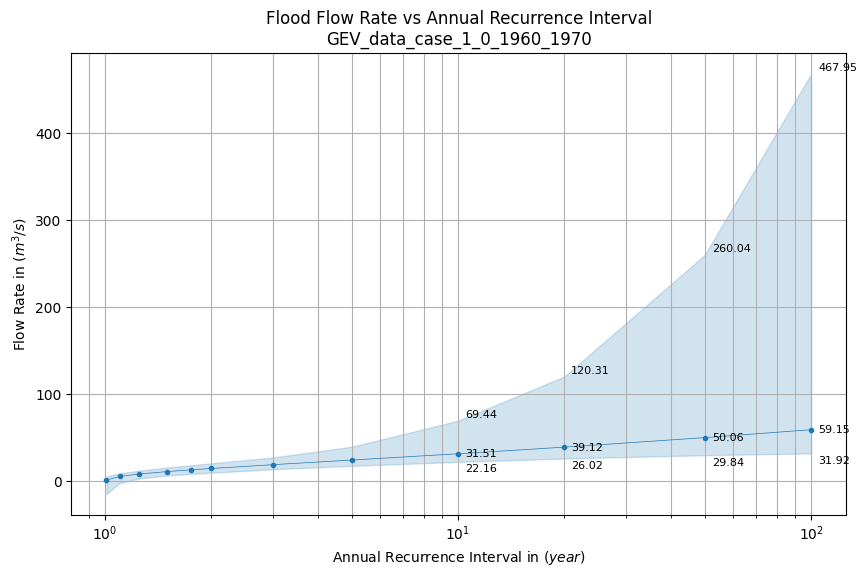

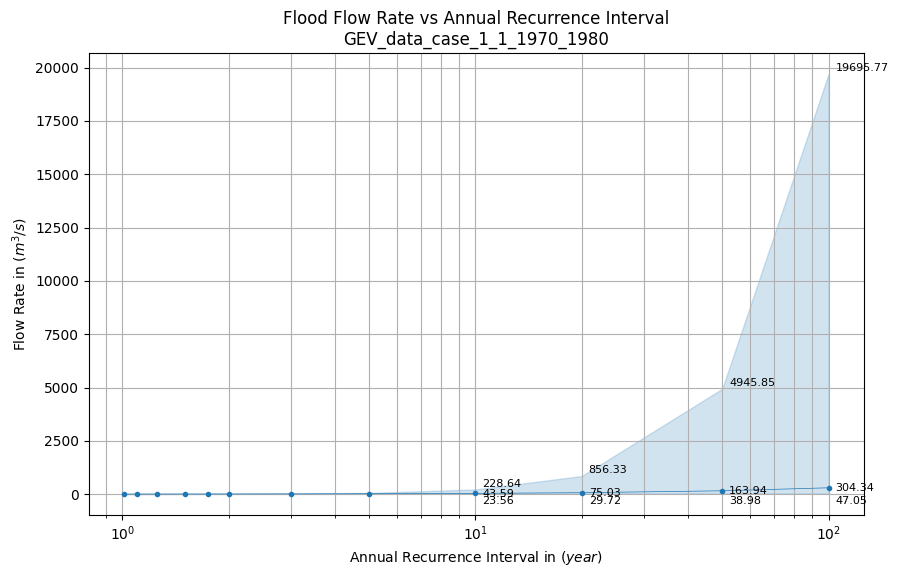

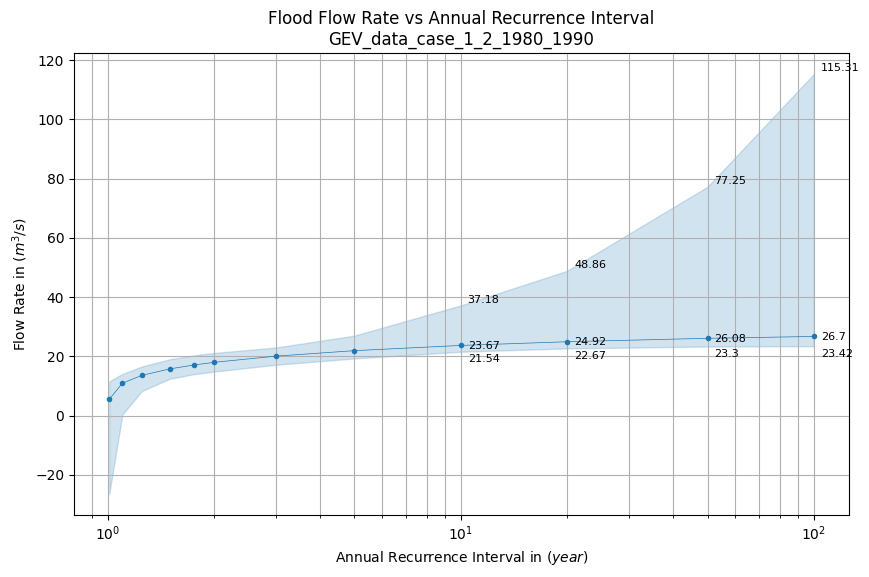

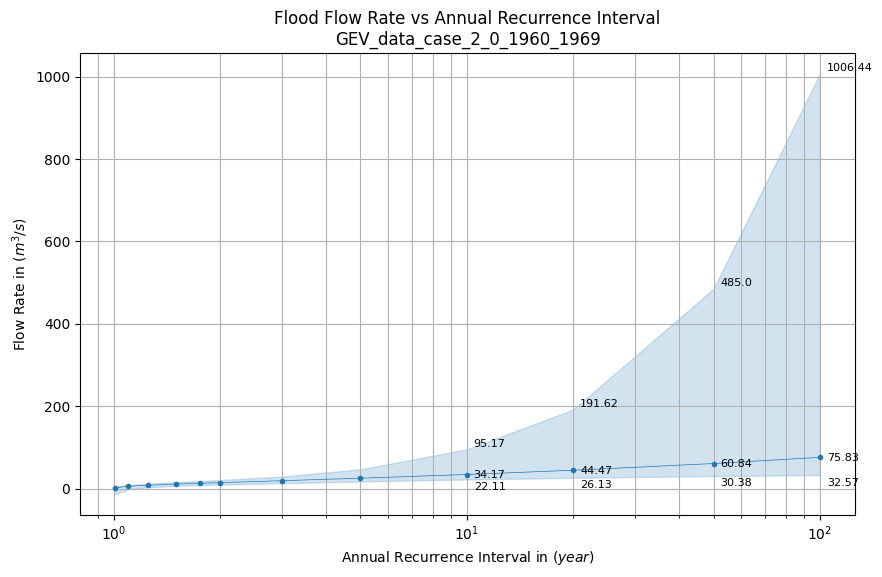

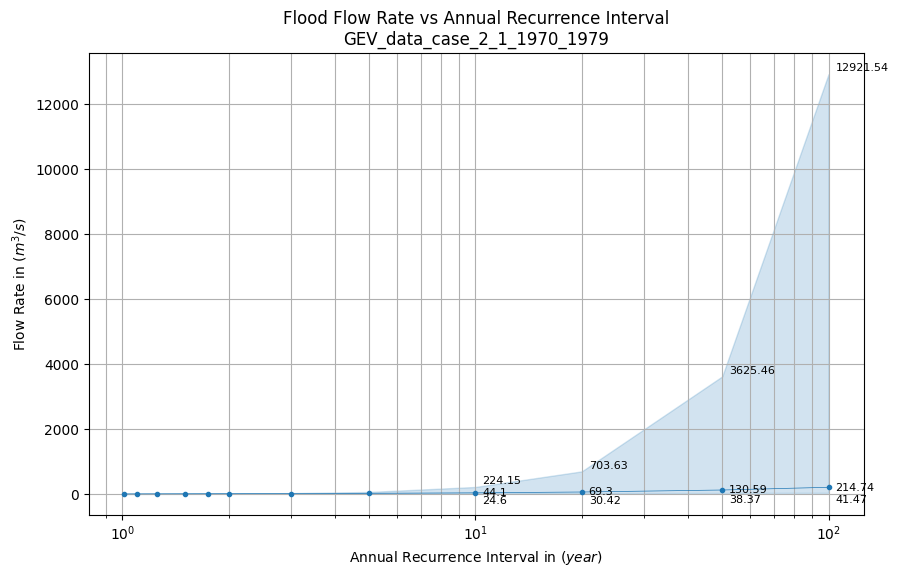

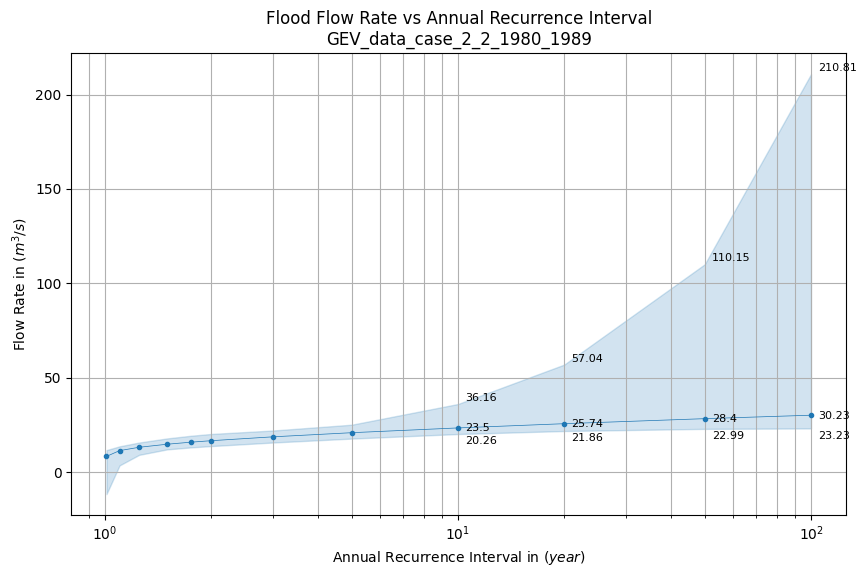

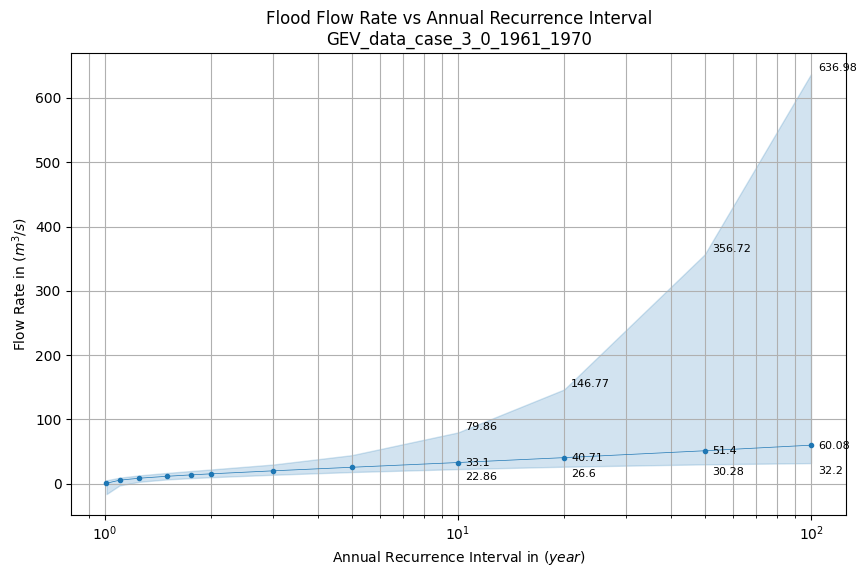

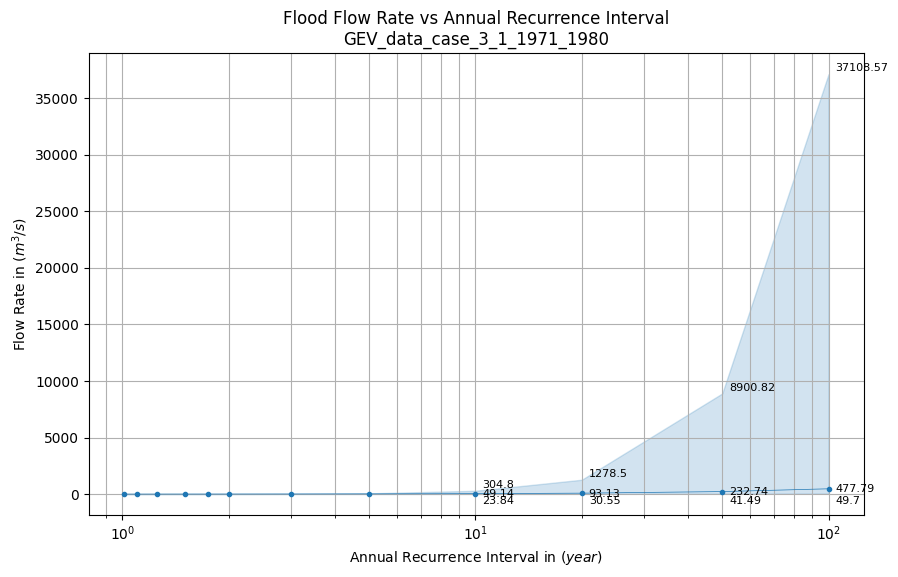

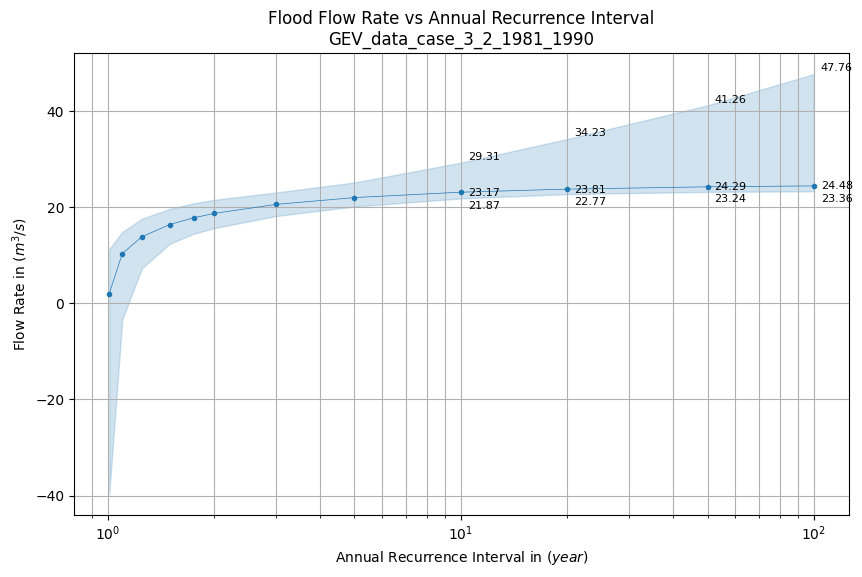

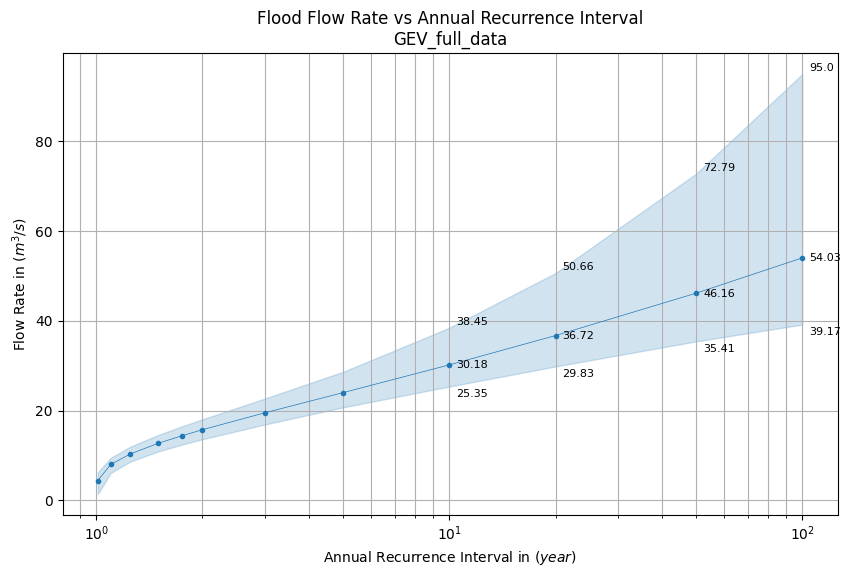

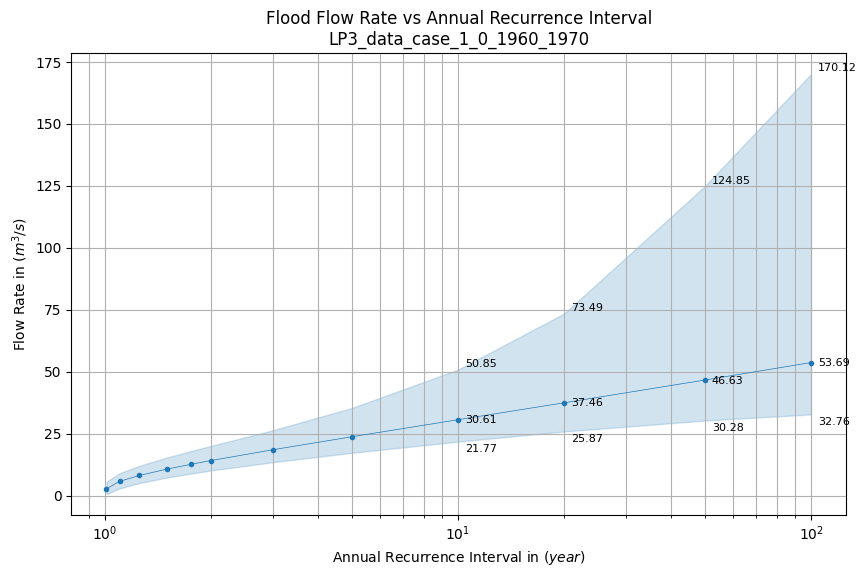

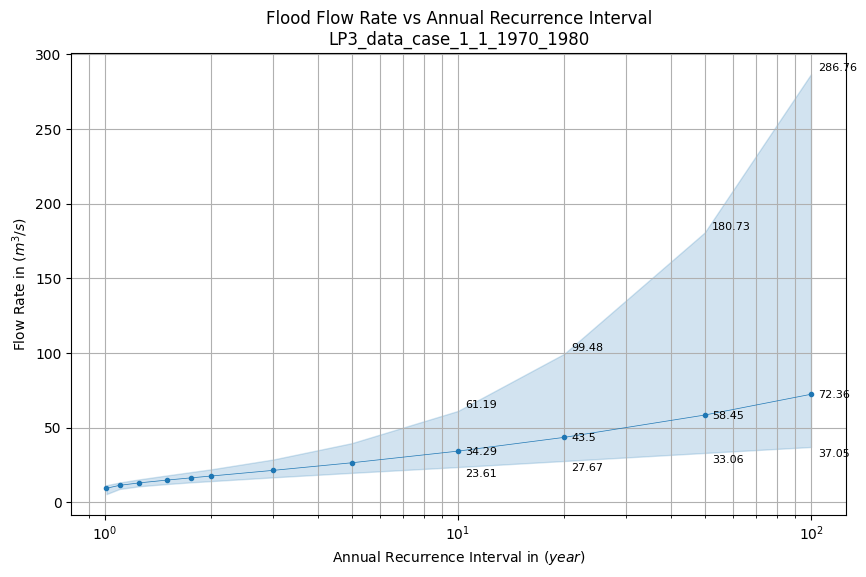

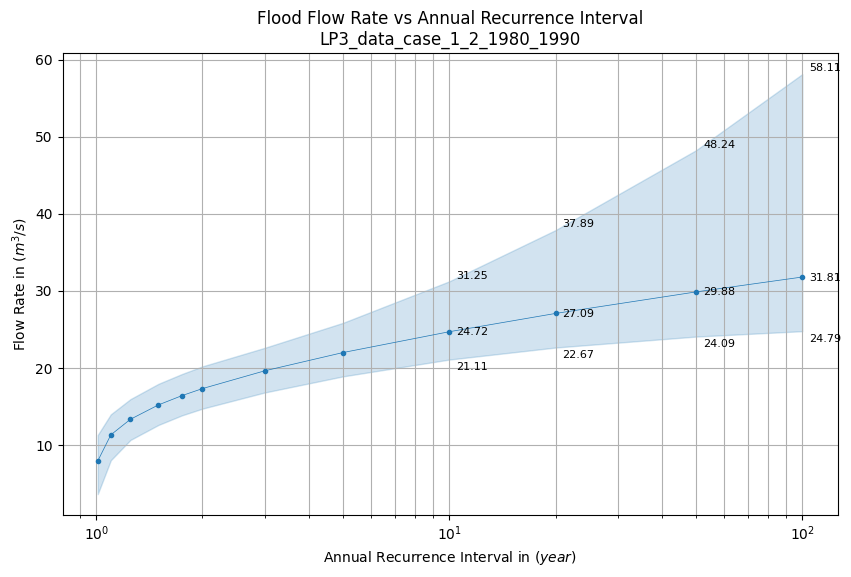

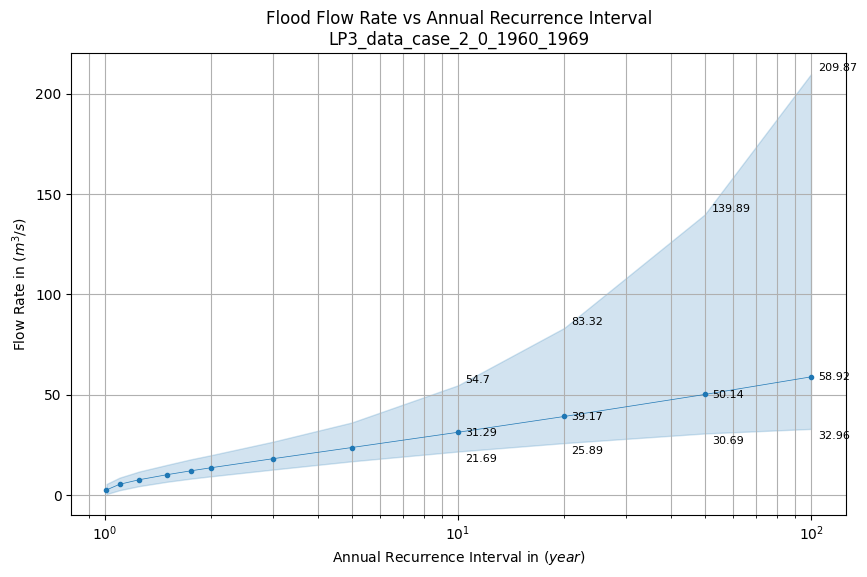

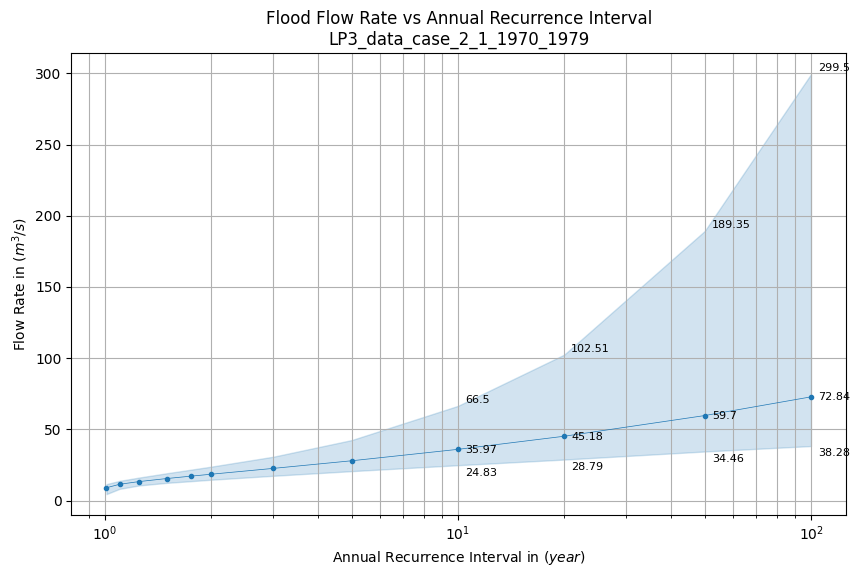

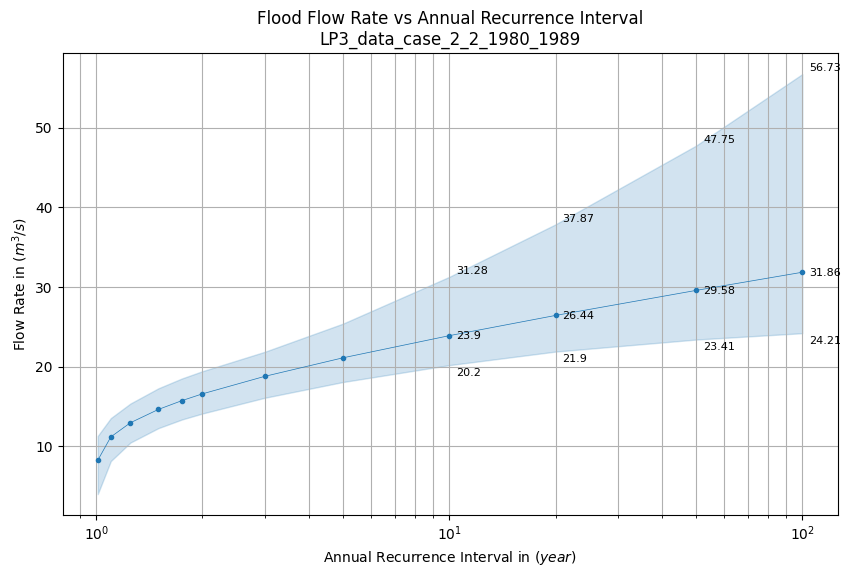

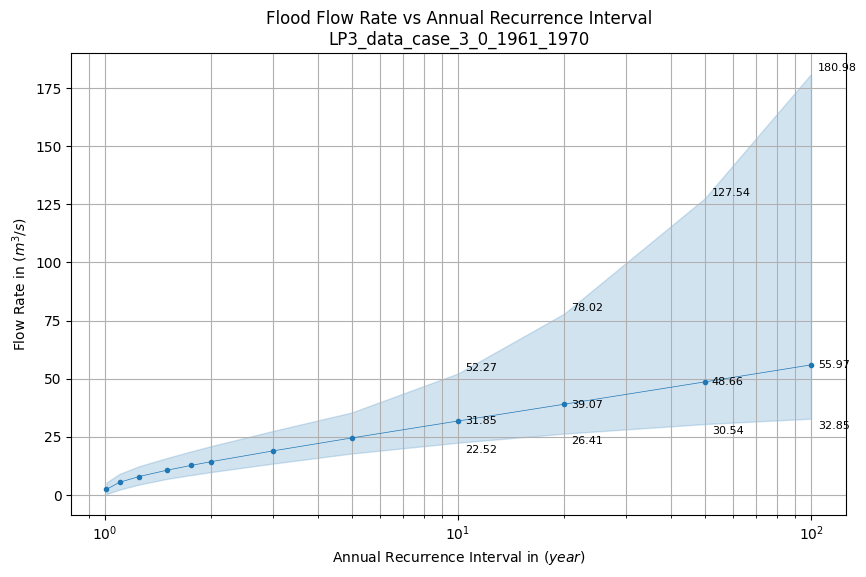

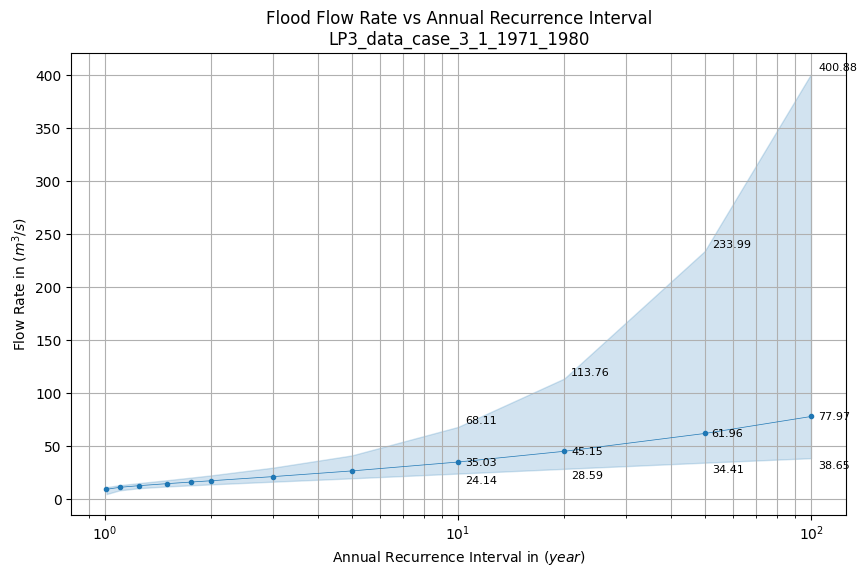

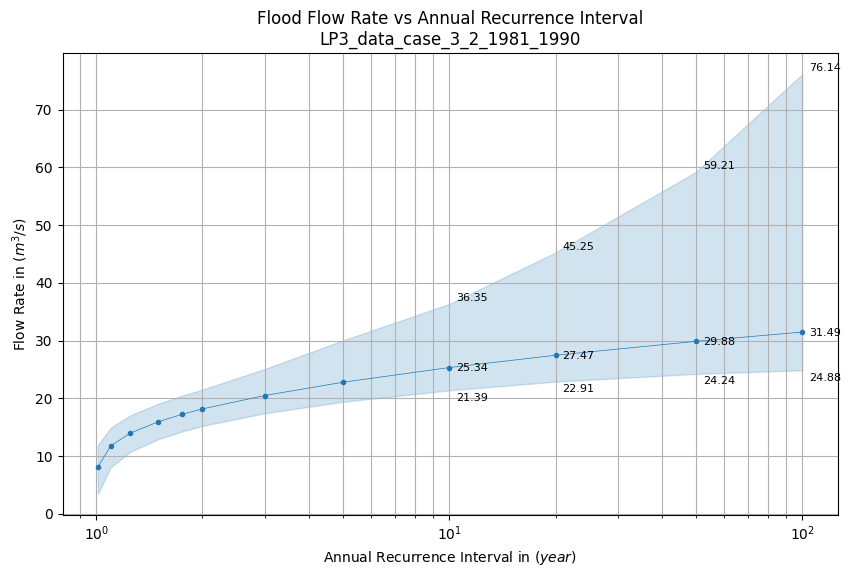

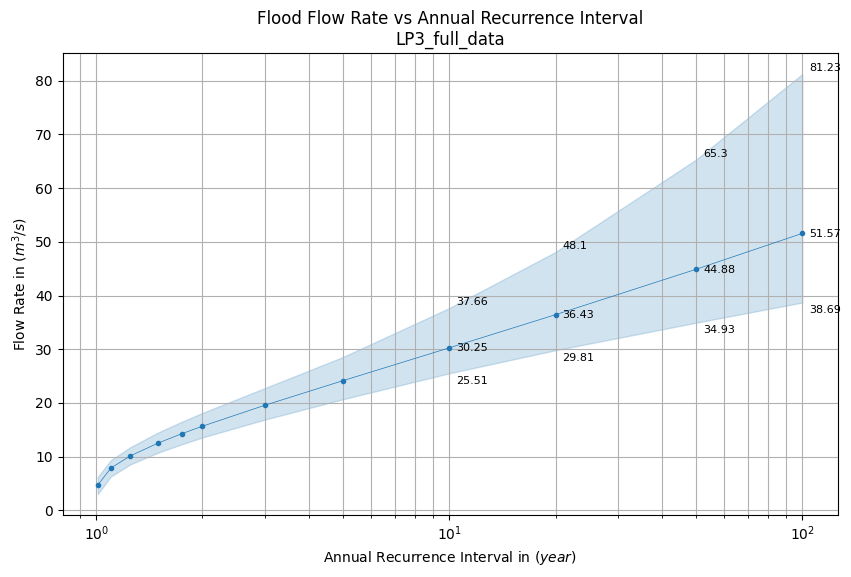

In [35]:
results.apply(func=lambda arg: plot_ffa(output_dir, arg.prob_fit, arg.data_case, arg.df), axis=1)
results

In [36]:
results

,file_name,data_case,prob_fit,skip_row_ind,df
0,results__data_case_1_0_1960_1970__Bayes__NoInf...,data_case_1_0_1960_1970,GEV,100,ARI flow_rate lower_5 upper_95 0 ...
1,results__data_case_1_1_1970_1980__Bayes__NoInf...,data_case_1_1_1970_1980,GEV,99,ARI flow_rate lower_5 upper_95 0 ...
2,results__data_case_1_2_1980_1990__Bayes__NoInf...,data_case_1_2_1980_1990,GEV,99,ARI flow_rate lower_5 upper_95 0 ...
3,results__data_case_2_0_1960_1969__Bayes__NoInf...,data_case_2_0_1960_1969,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
4,results__data_case_2_1_1970_1979__Bayes__NoInf...,data_case_2_1_1970_1979,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
5,results__data_case_2_2_1980_1989__Bayes__NoInf...,data_case_2_2_1980_1989,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
6,results__data_case_3_0_1961_1970__Bayes__NoInf...,data_case_3_0_1961_1970,GEV,99,ARI flow_rate lower_5 upper_95 0 ...
7,results__data_case_3_1_1971_1980__Bayes__NoInf...,data_case_3_1_1971_1980,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
8,results__data_case_3_2_1981_1990__Bayes__NoInf...,data_case_3_2_1981_1990,GEV,98,ARI flow_rate lower_5 upper_95 0 ...
9,results__full_data__Bayes__NoInf__GEV.txt,full_data,GEV,128,ARI flow_rate lower_5 upper_95 0 ...


In [37]:
def prepare_data(arg_output_dir, arg_prob_fit, arg_data_case, arg_df):
    df = arg_df.iloc[8:,:].copy()
    df.reset_index(drop=True, inplace=True)
    df['diff_perc_lower'] = 100*df.lower_5/df.flow_rate
    df['diff_perc_upper'] = 100*df.upper_95/df.flow_rate
    df['AEP'] = 100/df.ARI
    df.AEP = df.AEP.astype(int)
    df = df[df.columns[[0,6,1,2,3,4,5]]]
    df.to_csv(path_or_buf='{}df_{}_{}.csv'.format(arg_output_dir, arg_prob_fit, arg_data_case))
    return df

In [38]:
results['df_data'] = results.apply(func=lambda arg: prepare_data(output_dir, arg.prob_fit, arg.data_case, arg.df), axis=1)
results

,file_name,data_case,prob_fit,skip_row_ind,df,df_data
0,results__data_case_1_0_1960_1970__Bayes__NoInf...,data_case_1_0_1960_1970,GEV,100,ARI flow_rate lower_5 upper_95 0 ...,ARI AEP flow_rate lower_5 upper_95 d...
1,results__data_case_1_1_1970_1980__Bayes__NoInf...,data_case_1_1_1970_1980,GEV,99,ARI flow_rate lower_5 upper_95 0 ...,ARI AEP flow_rate lower_5 upper_95 d...
2,results__data_case_1_2_1980_1990__Bayes__NoInf...,data_case_1_2_1980_1990,GEV,99,ARI flow_rate lower_5 upper_95 0 ...,ARI AEP flow_rate lower_5 upper_95 d...
3,results__data_case_2_0_1960_1969__Bayes__NoInf...,data_case_2_0_1960_1969,GEV,98,ARI flow_rate lower_5 upper_95 0 ...,ARI AEP flow_rate lower_5 upper_95 d...
4,results__data_case_2_1_1970_1979__Bayes__NoInf...,data_case_2_1_1970_1979,GEV,98,ARI flow_rate lower_5 upper_95 0 ...,ARI AEP flow_rate lower_5 upper_95 d...
5,results__data_case_2_2_1980_1989__Bayes__NoInf...,data_case_2_2_1980_1989,GEV,98,ARI flow_rate lower_5 upper_95 0 ...,ARI AEP flow_rate lower_5 upper_95 d...
6,results__data_case_3_0_1961_1970__Bayes__NoInf...,data_case_3_0_1961_1970,GEV,99,ARI flow_rate lower_5 upper_95 0 ...,ARI AEP flow_rate lower_5 upper_95 d...
7,results__data_case_3_1_1971_1980__Bayes__NoInf...,data_case_3_1_1971_1980,GEV,98,ARI flow_rate lower_5 upper_95 0 ...,ARI AEP flow_rate lower_5 upper_95 d...
8,results__data_case_3_2_1981_1990__Bayes__NoInf...,data_case_3_2_1981_1990,GEV,98,ARI flow_rate lower_5 upper_95 0 ...,ARI AEP flow_rate lower_5 upper_95 d...
9,results__full_data__Bayes__NoInf__GEV.txt,full_data,GEV,128,ARI flow_rate lower_5 upper_95 0 ...,ARI AEP flow_rate lower_5 upper_95 d...


In [54]:
asd = '1_2'
asd

'1_2'

In [56]:
asd = asd.split(sep='_')
asd

['1', '2']

In [65]:
' to '.join(asd)

'1 to 2'

In [63]:
qqq.join?

Signature: qqq.join(iterable, /)
Docstring:
Concatenate any number of strings.

The string whose method is called is inserted in between each given string.
The result is returned as a new string.

Example: '.'.join(['ab', 'pq', 'rs']) -> 'ab.pq.rs'
Type:      builtin_function_or_method

In [72]:
def return_label(arg):
    label = arg.split(sep='_')[0]
    if label == 'data':
        label = ' '.join([' '.join(arg.split(sep='_')[1:3])] + ['-'] + ['-'.join(arg.split(sep='_')[4:])])
    else:
        label = ' '.join(arg.split(sep='_'))
    return label

In [73]:
results.data_case.apply(func=lambda arg: return_label(arg))

0     case 1 - 1960-1970
1     case 1 - 1970-1980
2     case 1 - 1980-1990
3     case 2 - 1960-1969
4     case 2 - 1970-1979
5     case 2 - 1980-1989
6     case 3 - 1961-1970
7     case 3 - 1971-1980
8     case 3 - 1981-1990
9              full data
10    case 1 - 1960-1970
11    case 1 - 1970-1980
12    case 1 - 1980-1990
13    case 2 - 1960-1969
14    case 2 - 1970-1979
15    case 2 - 1980-1989
16    case 3 - 1961-1970
17    case 3 - 1971-1980
18    case 3 - 1981-1990
19             full data
Name: data_case, dtype: object

In [39]:
results.df_data[1]

,ARI,AEP,flow_rate,lower_5,upper_95,diff_perc_lower,diff_perc_upper
0,10.0,10,43.59,23.56,228.64,54.049094,524.523973
1,20.0,5,75.03,29.72,856.33,39.610822,1141.316807
2,50.0,2,163.94,38.98,4945.85,23.776992,3016.865927
3,100.0,1,304.34,47.05,19695.77,15.459683,6471.633699


In [40]:
results_GEV_full, results_LP3_full = results.iloc[:10,:], results.iloc[10:,:]
results_LP3_full.reset_index(drop=True, inplace=True)

results_GEV_full = [results_GEV_full.iloc[9:,:], results_GEV_full.iloc[:3,:], results_GEV_full.iloc[3:6,:], results_GEV_full.iloc[6:9,:]]
results_LP3_full = [results_LP3_full.iloc[9:,:], results_LP3_full.iloc[:3,:], results_LP3_full.iloc[3:6,:], results_LP3_full.iloc[6:9,:]]

results_GEV_full = [ind.reset_index(drop=True) for ind in results_GEV_full]
results_LP3_full = [ind.reset_index(drop=True) for ind in results_LP3_full]

results_GEV_full, results_GEV_c1, results_GEV_c2, results_GEV_c3 = results_GEV_full
results_LP3_full, results_LP3_c1, results_LP3_c2, results_LP3_c3 = results_LP3_full

print(results_GEV_full, results_GEV_c1, results_GEV_c2, results_GEV_c3, results_LP3_full, results_LP3_c1, results_LP3_c2, results_LP3_c3, sep='\n')

                                   file_name  data_case prob_fit  \
0  results__full_data__Bayes__NoInf__GEV.txt  full_data      GEV   

   skip_row_ind                                                 df  \
0           128         ARI  flow_rate  lower_5  upper_95
0    ...   

                                             df_data  
0       ARI  AEP  flow_rate  lower_5  upper_95  d...  
                                           file_name                data_case  \
0  results__data_case_1_0_1960_1970__Bayes__NoInf...  data_case_1_0_1960_1970   
1  results__data_case_1_1_1970_1980__Bayes__NoInf...  data_case_1_1_1970_1980   
2  results__data_case_1_2_1980_1990__Bayes__NoInf...  data_case_1_2_1980_1990   

  prob_fit  skip_row_ind                                                 df  \
0      GEV           100         ARI  flow_rate  lower_5  upper_95
0    ...   
1      GEV            99         ARI  flow_rate  lower_5  upper_95
0    ...   
2      GEV            99         ARI  flow_rate  l

In [41]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
pd.MultiIndex?

Init signature:
pd.MultiIndex(
    levels=None,
    codes=None,
    sortorder=None,
    names=None,
    dtype=None,
    copy: 'bool' = False,
    name=None,
    verify_integrity: 'bool' = True,
) -> 'MultiIndex'
Docstring:     
A multi-level, or hierarchical, index object for pandas objects.

Parameters
----------
levels : sequence of arrays
    The unique labels for each level.
codes : sequence of arrays
    Integers for each level designating which label at each location.
sortorder : optional int
    Level of sortedness (must be lexicographically sorted by that
    level).
names : optional sequence of objects
    Names for each of the index levels. (name is accepted for compat).
copy : bool, default False
    Copy the meta-data.
verify_integrity : bool, default True
    Check that the levels/codes are consistent and valid.

Attributes
----------
names
levels
codes
nlevels
levshape
dtypes

Methods
-------
from_arrays
from_tuples
from_product
from_frame
set_levels
set_codes
to_frame
to

In [42]:
# results_GEV_full.df_data[0].index = pd.MultiIndex.from_product(iterables=[['full_data'], results_GEV_full.df_data[0].index])
results_GEV_full.df_data[0].index = pd.Index(data=['full_data']*len(results_GEV_full.df_data[0].index))
results_GEV_full.df_data[0]

,ARI,AEP,flow_rate,lower_5,upper_95,diff_perc_lower,diff_perc_upper
full_data,10.0,10,30.18,25.35,38.45,83.996024,127.402253
full_data,20.0,5,36.72,29.83,50.66,81.236383,137.962963
full_data,50.0,2,46.16,35.41,72.79,76.711438,157.690641
full_data,100.0,1,54.03,39.17,95.00,72.496761,175.828244


In [43]:
results_GEV_c1.df_data[0].index = pd.Index(data=['case_1']*len(results_GEV_c1.df_data[0].index))
results_GEV_c1.df_data[0]

,ARI,AEP,flow_rate,lower_5,upper_95,diff_perc_lower,diff_perc_upper
case_1,10.0,10,31.51,22.16,69.44,70.326880,220.374484
case_1,20.0,5,39.12,26.02,120.31,66.513292,307.540900
case_1,50.0,2,50.06,29.84,260.04,59.608470,519.456652
case_1,100.0,1,59.15,31.92,467.95,53.964497,791.124260


In [44]:
results_GEV_c2.df_data[0].index = pd.Index(data=['case_2']*len(results_GEV_c2.df_data[0].index))
results_GEV_c2.df_data[0]

,ARI,AEP,flow_rate,lower_5,upper_95,diff_perc_lower,diff_perc_upper
case_2,10.0,10,34.17,22.11,95.17,64.705882,278.519169
case_2,20.0,5,44.47,26.13,191.62,58.758714,430.897234
case_2,50.0,2,60.84,30.38,485.00,49.934254,797.172913
case_2,100.0,1,75.83,32.57,1006.44,42.951339,1327.231966


In [45]:
results_GEV_c3.df_data[0].index = pd.Index(data=['case_3']*len(results_GEV_c3.df_data[0].index))
results_GEV_c3.df_data[0]

,ARI,AEP,flow_rate,lower_5,upper_95,diff_perc_lower,diff_perc_upper
case_3,10.0,10,33.10,22.86,79.86,69.063444,241.268882
case_3,20.0,5,40.71,26.60,146.77,65.340211,360.525669
case_3,50.0,2,51.40,30.28,356.72,58.910506,694.007782
case_3,100.0,1,60.08,32.20,636.98,53.595206,1060.219707


In [46]:
pd.concat(objs=[results_GEV_full.df_data[0], results_GEV_c1.df_data[0], results_GEV_c2.df_data[0], results_GEV_c3.df_data[0]])

,ARI,AEP,flow_rate,lower_5,upper_95,diff_perc_lower,diff_perc_upper
full_data,10.0,10,30.18,25.35,38.45,83.996024,127.402253
full_data,20.0,5,36.72,29.83,50.66,81.236383,137.962963
full_data,50.0,2,46.16,35.41,72.79,76.711438,157.690641
full_data,100.0,1,54.03,39.17,95.00,72.496761,175.828244
case_1,10.0,10,31.51,22.16,69.44,70.326880,220.374484
case_1,20.0,5,39.12,26.02,120.31,66.513292,307.540900
case_1,50.0,2,50.06,29.84,260.04,59.608470,519.456652
case_1,100.0,1,59.15,31.92,467.95,53.964497,791.124260
case_2,10.0,10,34.17,22.11,95.17,64.705882,278.519169
case_2,20.0,5,44.47,26.13,191.62,58.758714,430.897234


In [ ]:
[results_GEV_c1, results_GEV_c2, results_GEV_c3]

[                                           file_name                data_case  \
 0  results__data_case_1_0_1960_1970__Bayes__NoInf...  data_case_1_0_1960_1970   
 1  results__data_case_1_1_1970_1980__Bayes__NoInf...  data_case_1_1_1970_1980   
 2  results__data_case_1_2_1980_1990__Bayes__NoInf...  data_case_1_2_1980_1990   
 
   prob_fit  skip_row_ind                                                 df  \
 0      GEV           100         ARI  flow_rate  lower_5  upper_95
 0    ...   
 1      GEV            99         ARI  flow_rate  lower_5  upper_95
 0    ...   
 2      GEV            99         ARI  flow_rate  lower_5  upper_95
 0    ...   
 
                                              df_data  
 0       ARI  AEP  flow_rate  lower_5  upper_95  d...  
 1       ARI  AEP  flow_rate  lower_5  upper_95  d...  
 2       ARI  AEP  flow_rate  lower_5  upper_95  d...  ,
                                            file_name                data_case  \
 0  results__data_case_2_0_1960_1969__

In [ ]:
results_GEV_full

,file_name,data_case,prob_fit,start_ind
0,results__full_data__Bayes__NoInf__GEV.txt,full_data,GEV,128


In [ ]:
list(zip(results_GEV_c1.itertuples(index=False, name=None), ind_GEV_c1))

[(('results__data_case_1_0_1960_1970__Bayes__NoInf__GEV.txt',
   'data_case_1_0_1960_1970',
   'GEV'),
  100),
 (('results__data_case_1_1_1970_1980__Bayes__NoInf__GEV.txt',
   'data_case_1_1_1970_1980',
   'GEV'),
  99),
 (('results__data_case_1_2_1980_1990__Bayes__NoInf__GEV.txt',
   'data_case_1_2_1980_1990',
   'GEV'),
  99)]

In [ ]:
list(results_GEV_c1.itertuples(index=False, name=None))

[('results__data_case_1_0_1960_1970__Bayes__NoInf__GEV.txt',
  'data_case_1_0_1960_1970',
  'GEV'),
 ('results__data_case_1_1_1970_1980__Bayes__NoInf__GEV.txt',
  'data_case_1_1_1970_1980',
  'GEV'),
 ('results__data_case_1_2_1980_1990__Bayes__NoInf__GEV.txt',
  'data_case_1_2_1980_1990',
  'GEV')]

In [ ]:
asd = pd.read_table(
    filepath_or_buffer='{}{}'.format(input_dir, results.file_name[9]), 
    sep='\s+', header=None, names=['ARI', 'flow_rate', 'lower_5', 'upper_95'], 
    skiprows=128, nrows=12
    )
asd

,ARI,flow_rate,lower_5,upper_95
0,1.01,4.39,1.37,6.22
1,1.10,7.99,6.10,9.48
2,1.25,10.34,8.65,11.96
3,1.50,12.71,10.89,14.57
4,1.75,14.39,12.42,16.49
5,2.00,15.73,13.61,18.05
6,3.00,19.49,16.89,22.67
7,5.00,23.99,20.71,28.63
8,10.00,30.18,25.35,38.45
9,20.00,36.72,29.83,50.66


In [ ]:
asd_1 = pd.read_table(
    filepath_or_buffer='{}{}'.format(input_dir, results.file_name[0]), 
    sep='\s+', header=None, names=['ARI', 'flow_rate', 'lower_5', 'upper_95'], 
    skiprows=100, nrows=12
    )
asd_1

,ARI,flow_rate,lower_5,upper_95
0,1.01,1.18,-14.89,5.53
1,1.10,5.45,-2.27,8.97
2,1.25,8.23,3.05,12.10
3,1.50,11.03,6.50,15.69
4,1.75,13.01,8.34,18.31
5,2.00,14.59,9.65,20.53
6,3.00,19.00,13.69,27.31
7,5.00,24.28,17.56,39.60
8,10.00,31.51,22.16,69.44
9,20.00,39.12,26.02,120.31


In [ ]:
asd_2 = pd.read_table(
    filepath_or_buffer='{}{}'.format(input_dir, results.file_name[1]), 
    sep='\s+', header=None, names=['ARI', 'flow_rate', 'lower_5', 'upper_95'], 
    skiprows=99, nrows=12
    )
asd_2

,ARI,flow_rate,lower_5,upper_95
0,1.01,11.65,8.06,12.18
1,1.10,12.47,10.46,13.15
2,1.25,13.27,11.77,14.61
3,1.50,14.38,12.61,16.88
4,1.75,15.40,13.18,18.85
5,2.00,16.37,13.71,21.15
6,3.00,20.06,15.57,31.50
7,5.00,27.04,18.56,65.94
8,10.00,43.59,23.56,228.64
9,20.00,75.03,29.72,856.33


In [ ]:
asd_3 = pd.read_table(
    filepath_or_buffer='{}{}'.format(input_dir, results.file_name[2]), 
    sep='\s+', header=None, names=['ARI', 'flow_rate', 'lower_5', 'upper_95'], 
    skiprows=99, nrows=12
    )
asd_3

,ARI,flow_rate,lower_5,upper_95
0,1.01,5.45,-26.55,11.49
1,1.10,10.90,0.29,14.04
2,1.25,13.57,8.28,16.56
3,1.50,15.75,12.42,19.01
4,1.75,17.05,13.94,20.30
5,2.00,17.96,14.84,21.13
6,3.00,20.06,17.15,22.98
7,5.00,21.91,19.28,26.99
8,10.00,23.67,21.54,37.18
9,20.00,24.92,22.67,48.86


In [ ]:
def asdasd(
    arg_full_x, arg_full_y, arg_full_y_95, arg_full_y_05,
    arg_c1_x, arg_c1_y, arg_c1_y_95, arg_c1_y_05,
    arg_c2_x, arg_c2_y, arg_c2_y_95, arg_c2_y_05,
    arg_c3_x, arg_c3_y, arg_c3_y_95, arg_c3_y_05,
    ):

    fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,16))

    ax[0].plot(
        arg_full_x,
        arg_full_y,
        '-o',
        color='tab:blue',
        linewidth=0.5,
        markersize=2
        )

    ax[0].fill_between(
        x=arg_full_x,
        y1=arg_full_y_95,
        y2=arg_full_y_05,
        color='tab:blue',
        alpha=0.2
        )

    for ind1, ind2 in zip(arg_full_x[8:], arg_full_y[8:]):
        ax[0].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -2.5),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_full_x[8:], arg_full_y_95[8:]):
        ax[0].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, 2),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_full_x[8:], arg_full_y_05[8:]):
        ax[0].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -7.5),
            textcoords='offset points',
            fontsize=8
            )

    ax[0].grid(visible=True, which='both')
    ax[0].set_xscale(value='log')
    ax[0].set_title(label='asd', loc='left')

    ###

    ax[1].plot(
        arg_c1_x,
        arg_c1_y,
        '-o',
        color='tab:orange',
        linewidth=0.5,
        markersize=2
        )

    ax[1].fill_between(
        x=arg_c1_x,
        y1=arg_c1_y_95,
        y2=arg_c1_y_05,
        color='tab:orange',
        alpha=0.2
        )

    for ind1, ind2 in zip(arg_c1_x[8:], arg_c1_y[8:]):
        ax[1].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -2.5),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_c1_x[8:], arg_c1_y_95[8:]):
        ax[1].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, 2),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_c1_x[8:], arg_c1_y_05[8:]):
        ax[1].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -7.5),
            textcoords='offset points',
            fontsize=8
            )

    ax[1].grid(visible=True, which='both')
    ax[1].set_xscale(value='log')
    ax[1].set_title(label='asd', loc='left')

    ###

    ax[2].plot(
        arg_c2_x,
        arg_c2_y,
        '-o',
        color='tab:green',
        linewidth=0.5,
        markersize=2
        )

    ax[2].fill_between(
        x=arg_c2_x,
        y1=arg_c2_y_95,
        y2=arg_c2_y_05,
        color='tab:green',
        alpha=0.2
        )

    for ind1, ind2 in zip(arg_c2_x[8:], arg_c2_y[8:]):
        ax[2].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -2.5),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_c2_x[8:], arg_c2_y_95[8:]):
        ax[2].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, 2),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_c2_x[8:], arg_c2_y_05[8:]):
        ax[2].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -7.5),
            textcoords='offset points',
            fontsize=8
            )

    ax[2].grid(visible=True, which='both')
    ax[2].set_xscale(value='log')
    ax[2].set_title(label='asd', loc='left')

    ###

    ax[3].plot(
        arg_c3_x,
        arg_c3_y,
        '-o',
        color='tab:red',
        linewidth=0.5,
        markersize=2
        )

    ax[3].fill_between(
        x=arg_c3_x,
        y1=arg_c3_y_95,
        y2=arg_c3_y_05,
        color='tab:red',
        alpha=0.2
        )

    for ind1, ind2 in zip(arg_c3_x[8:], arg_c3_y[8:]):
        ax[3].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -2.5),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_c3_x[8:], arg_c3_y_95[8:]):
        ax[3].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, 2),
            textcoords='offset points',
            fontsize=8
            )

    for ind1, ind2 in zip(arg_c3_x[8:], arg_c3_y_05[8:]):
        ax[3].annotate(
            text=ind2,
            xy=(ind1, ind2),
            xytext=(5, -7.5),
            textcoords='offset points',
            fontsize=8
            )

    ax[3].grid(visible=True, which='both')
    ax[3].set_xscale(value='log')
    ax[3].set_title(label='asd', loc='left')

    fig.suptitle(t='asdasd', x=0.5, y=0.91)
    fig.supxlabel(t='Annual Recurrence Interval in ($year$)', x=0.5, y=0.08)
    fig.supylabel(t='Flow Rate in ($m^3/s$)', x=0.03, y=0.5)

    # fig.savefig(fname='')

Text(0.03, 0.5, 'Flow Rate in ($m^3/s$)')

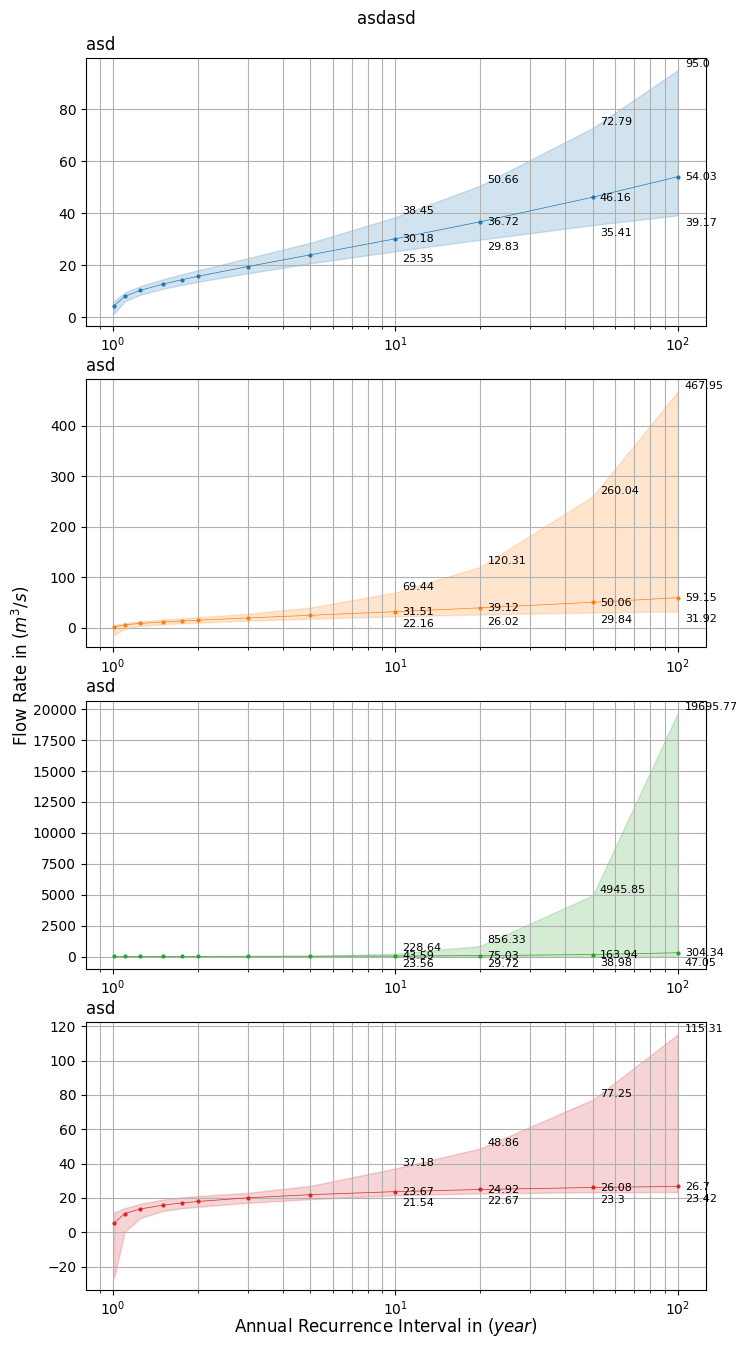

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,16))

ax[0].plot(
    asd.ARI,
    asd.flow_rate,
    '-o',
    color='tab:blue',
    linewidth=0.5,
    markersize=2
    )

ax[0].fill_between(
    x=asd.ARI,
    y1=asd.upper_95,
    y2=asd.lower_5,
    color='tab:blue',
    alpha=0.2
    )

for ind1, ind2 in zip(asd.ARI[8:], asd.flow_rate[8:]):
    ax[0].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -2.5),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd.ARI[8:], asd.upper_95[8:]):
    ax[0].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, 2),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd.ARI[8:], asd.lower_5[8:]):
    ax[0].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -7.5),
        textcoords='offset points',
        fontsize=8
        )

ax[0].grid(visible=True, which='both')
ax[0].set_xscale(value='log')
ax[0].set_title(label='asd', loc='left')

###

ax[1].plot(
    asd_1.ARI,
    asd_1.flow_rate,
    '-o',
    color='tab:orange',
    linewidth=0.5,
    markersize=2
    )

ax[1].fill_between(
    x=asd_1.ARI,
    y1=asd_1.upper_95,
    y2=asd_1.lower_5,
    color='tab:orange',
    alpha=0.2
    )

for ind1, ind2 in zip(asd_1.ARI[8:], asd_1.flow_rate[8:]):
    ax[1].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -2.5),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd_1.ARI[8:], asd_1.upper_95[8:]):
    ax[1].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, 2),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd_1.ARI[8:], asd_1.lower_5[8:]):
    ax[1].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -7.5),
        textcoords='offset points',
        fontsize=8
        )

ax[1].grid(visible=True, which='both')
ax[1].set_xscale(value='log')
ax[1].set_title(label='asd', loc='left')

###

ax[2].plot(
    asd_2.ARI,
    asd_2.flow_rate,
    '-o',
    color='tab:green',
    linewidth=0.5,
    markersize=2
    )

ax[2].fill_between(
    x=asd_2.ARI,
    y1=asd_2.upper_95,
    y2=asd_2.lower_5,
    color='tab:green',
    alpha=0.2
    )

for ind1, ind2 in zip(asd_2.ARI[8:], asd_2.flow_rate[8:]):
    ax[2].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -2.5),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd_2.ARI[8:], asd_2.upper_95[8:]):
    ax[2].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, 2),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd_2.ARI[8:], asd_2.lower_5[8:]):
    ax[2].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -7.5),
        textcoords='offset points',
        fontsize=8
        )

ax[2].grid(visible=True, which='both')
ax[2].set_xscale(value='log')
ax[2].set_title(label='asd', loc='left')

###

ax[3].plot(
    asd_3.ARI,
    asd_3.flow_rate,
    '-o',
    color='tab:red',
    linewidth=0.5,
    markersize=2
    )

ax[3].fill_between(
    x=asd_3.ARI,
    y1=asd_3.upper_95,
    y2=asd_3.lower_5,
    color='tab:red',
    alpha=0.2
    )

for ind1, ind2 in zip(asd_3.ARI[8:], asd_3.flow_rate[8:]):
    ax[3].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -2.5),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd_3.ARI[8:], asd_3.upper_95[8:]):
    ax[3].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, 2),
        textcoords='offset points',
        fontsize=8
        )

for ind1, ind2 in zip(asd_3.ARI[8:], asd_3.lower_5[8:]):
    ax[3].annotate(
        text=ind2,
        xy=(ind1, ind2),
        xytext=(5, -7.5),
        textcoords='offset points',
        fontsize=8
        )

ax[3].grid(visible=True, which='both')
ax[3].set_xscale(value='log')
ax[3].set_title(label='asd', loc='left')

fig.suptitle(t='asdasd', x=0.5, y=0.91)
fig.supxlabel(t='Annual Recurrence Interval in ($year$)', x=0.5, y=0.08)
fig.supylabel(t='Flow Rate in ($m^3/s$)', x=0.03, y=0.5)

# fig.savefig(fname='')